In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [2]:
# Get data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-22 17:21:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  3.22MB/s    in 0.4s    

2023-09-22 17:21:50 (3.22 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [45]:
df = pd.read_csv("housing.csv")

In [46]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 


Text(0.5, 1.0, 'Distribution of target variable : Median house value')

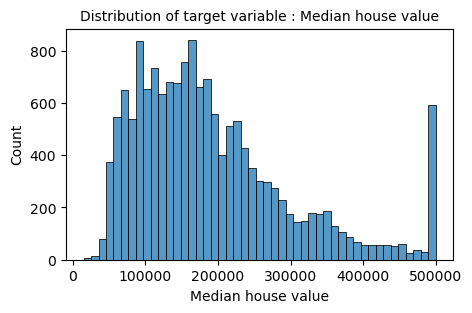

In [116]:
# Distribution of the target variable
plt.figure(figsize=(5,3))
sns.histplot(df.median_house_value)
plt.xlabel("Median house value")
plt.ylabel("Count")
plt.title("Distribution of target variable : Median house value", size=10)

It does not have a long tail.

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [48]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [49]:
# Clean string values
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ', '_')

In [50]:
df = df.loc[(df.ocean_proximity == 'inland')|(df.ocean_proximity == '<1h_ocean')]

In [51]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1h_ocean
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1h_ocean
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1h_ocean
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1h_ocean
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1h_ocean
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [52]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [54]:
df = df.loc[:, ['latitude', 'longitude', 'housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* **`total_bedrooms`**
* `population`
* `households`

In [56]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- **1195**
- 1295

In [58]:
np.percentile(df.population, 50)

1195.0

In [59]:
df.population.median()

1195.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.



In [63]:
df = df.reset_index(drop=True)

In [ ]:
np.random.seed(42)

In [65]:
n = len(df)
n

15687

In [68]:
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_val - n_test

In [70]:
n_test, n_val, n_train, (n_test + n_val + n_train)

(3137, 3137, 9413, 15687)

In [72]:
idx = np.arange(n)

In [74]:
np.random.shuffle(idx)

In [75]:
idx

array([ 3695, 14225,  2271, ...,  6196,   981,  3257])

In [76]:
df_shuffled = df.iloc[idx]
df_shuffled

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3695,33.98,-118.29,30.0,1162.0,318.0,1207.0,289.0,1.2230,100000.0
14225,38.26,-122.01,12.0,4132.0,710.0,2087.0,633.0,4.5987,139700.0
2271,34.22,-118.37,17.0,1787.0,463.0,1671.0,448.0,3.5521,151500.0
1796,36.29,-119.80,7.0,479.0,84.0,327.0,103.0,5.1728,107500.0
775,36.75,-119.83,33.0,662.0,183.0,607.0,181.0,1.3929,55600.0
...,...,...,...,...,...,...,...,...,...
2873,34.10,-118.30,25.0,3926.0,1715.0,4865.0,1612.0,1.6112,262500.0
13468,37.46,-121.91,26.0,2762.0,496.0,1716.0,459.0,5.6062,226800.0
6196,33.82,-118.26,28.0,5091.0,1074.0,4753.0,1033.0,3.6477,117400.0
981,36.79,-119.78,33.0,2260.0,440.0,966.0,413.0,2.9301,68300.0


In [86]:
df_test = df_shuffled.iloc[:n_test].copy()
df_test

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3695,33.98,-118.29,30.0,1162.0,318.0,1207.0,289.0,1.2230,100000.0
14225,38.26,-122.01,12.0,4132.0,710.0,2087.0,633.0,4.5987,139700.0
2271,34.22,-118.37,17.0,1787.0,463.0,1671.0,448.0,3.5521,151500.0
1796,36.29,-119.80,7.0,479.0,84.0,327.0,103.0,5.1728,107500.0
775,36.75,-119.83,33.0,662.0,183.0,607.0,181.0,1.3929,55600.0
...,...,...,...,...,...,...,...,...,...
11281,34.16,-117.51,2.0,718.0,98.0,119.0,50.0,4.1000,315000.0
13721,37.31,-122.02,35.0,2355.0,384.0,1248.0,378.0,5.9714,332500.0
15239,36.09,-119.05,9.0,3297.0,568.0,1749.0,568.0,4.0217,99200.0
8277,33.87,-117.78,16.0,5609.0,952.0,2624.0,934.0,5.3307,169600.0


In [91]:
df_val = df_shuffled.iloc[n_test:n_test+n_val].copy()
df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1919,39.01,-122.75,17.0,4162.0,967.0,889.0,414.0,3.4187,200500.0
4507,34.10,-117.81,19.0,1935.0,399.0,1126.0,389.0,3.8929,144600.0
220,39.79,-121.59,20.0,743.0,171.0,395.0,168.0,1.6250,88300.0
5117,34.22,-118.21,37.0,2260.0,322.0,941.0,303.0,8.3695,500001.0
15027,36.66,-118.96,18.0,1302.0,424.0,320.0,133.0,3.1964,80000.0
...,...,...,...,...,...,...,...,...,...
6251,33.96,-118.15,33.0,2418.0,485.0,1397.0,477.0,3.1083,285500.0
6577,33.84,-118.15,29.0,2448.0,354.0,894.0,349.0,7.6526,481300.0
6395,33.90,-118.13,36.0,1814.0,350.0,886.0,347.0,3.4868,208400.0
9929,33.96,-117.50,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,139200.0


In [92]:
df_train = df_shuffled.iloc[n_test+n_val:n_test+n_val+n_train].copy()
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14069,40.52,-122.33,23.0,2801.0,507.0,1318.0,454.0,3.5081,116700.0
1130,36.64,-119.59,27.0,823.0,171.0,798.0,200.0,3.0521,113800.0
4427,34.15,-118.33,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0
8760,33.65,-117.93,29.0,1253.0,375.0,1198.0,362.0,3.5179,225000.0
11006,38.47,-121.38,4.0,14418.0,2282.0,6578.0,2140.0,4.5604,145900.0
...,...,...,...,...,...,...,...,...,...
2873,34.10,-118.30,25.0,3926.0,1715.0,4865.0,1612.0,1.6112,262500.0
13468,37.46,-121.91,26.0,2762.0,496.0,1716.0,459.0,5.6062,226800.0
6196,33.82,-118.26,28.0,5091.0,1074.0,4753.0,1033.0,3.6477,117400.0
981,36.79,-119.78,33.0,2260.0,440.0,966.0,413.0,2.9301,68300.0


In [93]:
len(df_train)+len(df_val)+len(df_test)

15687

In [97]:
y_train_orig = df_train.median_house_value
y_val_orig = df_val.median_house_value
y_test_orig = df_test.median_house_value

In [101]:
# Apply log1p transform (log + 1 to avoid log(0) undefined error.)
y_train = np.log1p(y_train_orig).values
y_val = np.log1p(y_val_orig).values
y_test = np.log1p(y_test_orig).values

In [103]:
# remove the target variable from the training datasets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- **Both are equally good** (RMSE = 0.35)


#### Train linear regression model

In [126]:
# Implementing linear regression
# Basic formula, g(xi) = w0 (bias_term) + Summation(wi*xij) for all features, j=1 to N
# Bias term = value we predict when we don't have any information

# Vectorized notation, if W0 = W0*X0, x0 = 1
# g(x) = w0 + Xi_T.w (Xi = 1 for j=0)

# For Xw = y, W = (inverse(X_T*X))X_T * y

# Find, X, X_T, XTX_inv, y

# If X has missing values, the weights can be NaN

In [159]:
X = df_train_zero.values
X

array([[ 4.0520e+01, -1.2233e+02,  2.3000e+01, ...,  1.3180e+03,
         4.5400e+02,  3.5081e+00],
       [ 3.6640e+01, -1.1959e+02,  2.7000e+01, ...,  7.9800e+02,
         2.0000e+02,  3.0521e+00],
       [ 3.4150e+01, -1.1833e+02,  3.9000e+01, ...,  2.5900e+02,
         1.3800e+02,  2.3667e+00],
       ...,
       [ 3.3820e+01, -1.1826e+02,  2.8000e+01, ...,  4.7530e+03,
         1.0330e+03,  3.6477e+00],
       [ 3.6790e+01, -1.1978e+02,  3.3000e+01, ...,  9.6600e+02,
         4.1300e+02,  2.9301e+00],
       [ 3.4060e+01, -1.1832e+02,  4.3000e+01, ...,  1.6540e+03,
         5.6900e+02,  4.1250e+00]])

In [160]:
# add X = 1 for bias term

ones = np.ones(X.shape[0])
ones

array([1., 1., 1., ..., 1., 1., 1.])

In [161]:
X = np.column_stack([ones, X])
X

array([[ 1.0000e+00,  4.0520e+01, -1.2233e+02, ...,  1.3180e+03,
         4.5400e+02,  3.5081e+00],
       [ 1.0000e+00,  3.6640e+01, -1.1959e+02, ...,  7.9800e+02,
         2.0000e+02,  3.0521e+00],
       [ 1.0000e+00,  3.4150e+01, -1.1833e+02, ...,  2.5900e+02,
         1.3800e+02,  2.3667e+00],
       ...,
       [ 1.0000e+00,  3.3820e+01, -1.1826e+02, ...,  4.7530e+03,
         1.0330e+03,  3.6477e+00],
       [ 1.0000e+00,  3.6790e+01, -1.1978e+02, ...,  9.6600e+02,
         4.1300e+02,  2.9301e+00],
       [ 1.0000e+00,  3.4060e+01, -1.1832e+02, ...,  1.6540e+03,
         5.6900e+02,  4.1250e+00]])

In [162]:
X_T = X.T

In [163]:
XTX = X_T.dot(X)

In [164]:
XTX_inv = np.linalg.inv(XTX)

In [165]:
W = XTX_inv.dot(X_T).dot(y_train)

In [166]:
W

array([-1.02413072e+01, -2.76053052e-01, -2.62541005e-01,  1.52180940e-03,
       -2.16870463e-05,  2.55539738e-04, -1.88438369e-04,  4.61041972e-04,
        1.75797418e-01])

In [167]:
W[0], W[1:]

(-10.24130715973106,
 array([-2.76053052e-01, -2.62541005e-01,  1.52180940e-03, -2.16870463e-05,
         2.55539738e-04, -1.88438369e-04,  4.61041972e-04,  1.75797418e-01]))

In [191]:
def train_linear_regr(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    X_T = X.T
    XTX = X_T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    W = XTX_inv.dot(X_T).dot(y)
    return W[0], W[1:]

In [192]:
def prepare_X(df, fillna_val):
    dff = df.copy()
    dff['total_bedrooms'] = dff['total_bedrooms'].fillna(fillna_val)
    X = dff.values
    return X

In [206]:
# Evaluate the model on validation set
X = prepare_X(df_val, 0)

w0, w = train_linear_regr(X, y_val)

y_pred = w0 + X.dot(w)

Text(0.5, 1.0, 'Predictions vs actual distribution')

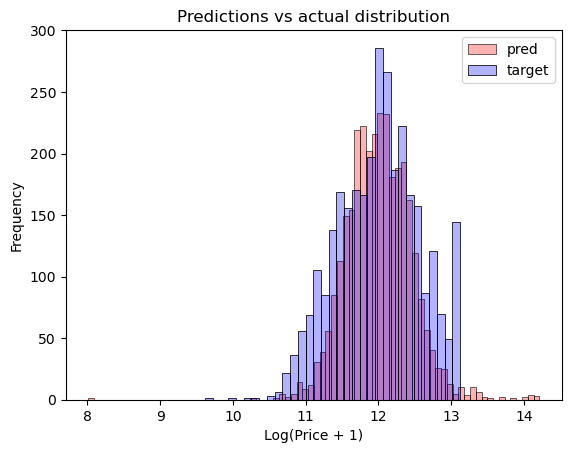

In [216]:
# Visualizing predictions against the true labels
sns.histplot(y_pred, color='red', alpha=0.3, label='pred')
sns.histplot(y_val, color='blue', alpha=0.3, label='target')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

In [241]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [242]:
rmse(y_val, y_pred)

0.3540097852141234

#### Option 1 : Handling missing values with 0

In [243]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regr(X_train, y_train)
y_pred = w0 + X_train.dot(w)
train_rmse = rmse(y_train, y_pred)
print(f"Training error: {train_rmse}")

# Evaluate on validation 
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
val_rmse = rmse(y_val, y_pred)
print(f"Validation error: {val_rmse}")

Training error: 0.3352856205063275
Validation error: 0.3491507513214049


#### Option 2 : Handling missing values with mean

In [244]:
X_train = prepare_X(df_train, df_train.total_bedrooms.mean())
w0, w = train_linear_regr(X_train, y_train)
y_pred = w0 + X_train.dot(w)
train_rmse = rmse(y_train, y_pred)
print(f"Training error: {train_rmse}")

# Evaluate on validation 
X_val = prepare_X(df_val, df_train.total_bedrooms.mean())
y_pred = w0 + X_val.dot(w)
val_rmse = rmse(y_val, y_pred)
print(f"Validation error: {val_rmse}")

Training error: 0.3349647110268456
Validation error: 0.34899919032487114


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001


In [245]:
r_param = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [246]:
# If you have correlated features, you may get very high rmse and high values for model weights.
# This happens because when one column is a linear combination of another column in XTX, i.e it is singular matrix, XTX is not invertible.
# To prevent this, we add a small value to the diagonal of the matrix (using an identity matrix)
# the larger the number we add, the more we have weights under control

In [247]:
def train_linear_regr_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    X_T = X.T
    XTX = X_T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    W = XTX_inv.dot(X_T).dot(y)
    return W[0], W[1:]

In [249]:
for r in r_param:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regr_reg(X_train, y_train, r)

    # Evaluate on validation 
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    val_rmse = rmse(y_val, y_pred)
    print(f"For r = {r}, RMSE = {val_rmse}")

For r = 0, RMSE = 0.3491507513214049
For r = 1e-06, RMSE = 0.34915074628220105
For r = 0.0001, RMSE = 0.34915024763674324
For r = 0.001, RMSE = 0.3491457546074512
For r = 0.01, RMSE = 0.34910465698107374
For r = 0.1, RMSE = 0.34896854815087563
For r = 1, RMSE = 0.3511207264280944
For r = 5, RMSE = 0.35350025165609505
For r = 10, RMSE = 0.3540097852141234


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- **0.005**
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [272]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []

for seed in seed_list:
    np.random.seed(seed)
    n = len(df)

    n_test = int(0.2*n)
    n_val = int(0.2*n)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)
    dff = df.iloc[idx]
    
    dff_test = dff.iloc[:n_test]
    dff_val = dff.iloc[n_test:n_test+n_val]
    dff_train = dff.iloc[n_test+n_val:]
    
    y_test_o = dff_test.median_house_value.values
    y_val_o = dff_val.median_house_value.values
    y_train_o = dff_train.median_house_value.values
    
    y_train = np.log1p(y_train_o)
    y_val = np.log1p(y_val_o)
    y_test = np.log1p(y_test_o)

    del dff_test['median_house_value']
    del dff_val['median_house_value']
    del dff_train['median_house_value']
    
    X_train = prepare_X(dff_train, 0)
    w0, w = train_linear_regr(X_train, y_train)
    
    X_val = prepare_X(dff_val, 0)
    y_pred = w0 + X_val.dot(w)
    error = rmse(y_val, y_pred)
    print(f"Seed: {seed}, RMSE: {error}")
    
    rmse_list.append(error)

Seed: 0, RMSE: 0.3356755504523999
Seed: 1, RMSE: 0.3370539549598672
Seed: 2, RMSE: 0.33581112991956624
Seed: 3, RMSE: 0.34933183266731743
Seed: 4, RMSE: 0.32967196605364124
Seed: 5, RMSE: 0.3424277872153873
Seed: 6, RMSE: 0.34288926596266933
Seed: 7, RMSE: 0.3338919501471513
Seed: 8, RMSE: 0.34069985005480175
Seed: 9, RMSE: 0.3379334325642992


In [273]:
np.std(rmse_list)

0.005231004122912248

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- **0.33**
- 0.43



In [276]:
np.random.seed(9)
n = len(df)

n_test = int(0.2*n)
n_val = int(0.2*n)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)
dff = df.iloc[idx]

dff_test = dff.iloc[:n_test]
dff_val = dff.iloc[n_test:n_test+n_val]
dff_train = dff.iloc[n_test+n_val:]

y_test_o = dff_test.median_house_value.values
y_val_o = dff_val.median_house_value.values
y_train_o = dff_train.median_house_value.values

y_train = np.log1p(y_train_o)
y_val = np.log1p(y_val_o)
y_test = np.log1p(y_test_o)

del dff_test['median_house_value']
del dff_val['median_house_value']
del dff_train['median_house_value']

dff_full_train = pd.concat([dff_train, dff_val])
y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X(dff_full_train, 0)
w0, w = train_linear_regr_reg(X_full_train, y_full_train, 0.001)

X_test = prepare_X(dff_test, 0)
y_pred = w0 + X_test.dot(w)
error = rmse(y_test, y_pred)

error

0.34685504000068734

## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.